# Life Expectancy Scenario
Authors: Giovan, Dhiyaa

In [180]:
# Using pandas to turn the dataset into a dataframe
# and matplotlib for plotting the data
import pandas as pd
import matplotlib.pyplot as plt

# Reading in the dataset
df = pd.read_csv('Life Expectancy Data.csv')

# Display the first 10 rows to ensure the data is loaded properly,
# and to see what we're working with.
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## 1. Data Exploration and Analysis


In [181]:
# Looking at the shape of our data (number of rows and columns)
print(f"Shape: {df.shape}")

# Viewing all columns
df.columns

Shape: (2938, 22)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [182]:
# Removed spaces in feature names to make working with data easier
df.columns = df.columns.str.strip()
df.rename(columns={
    'Country': 'Country',
    'Year': 'Year',
    'Status': 'Status',
    'Life expectancy': 'Life_Expectancy',
    'Adult Mortality': 'Adult_Mortality',
    'infant deaths': 'Infant_Deaths',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Percentage_Expenditure',
    'Hepatitis B': 'Hepatitis_B',
    'Measles': 'Measles',
    'BMI': 'BMI',
    'under-five deaths': 'Under_Five_Deaths',
    'Polio': 'Polio',
    'Total expenditure': 'Total_Expenditure',
    'Diphtheria': 'Diphtheria',
    'HIV/AIDS': 'HIV_AIDS',
    'GDP': 'GDP',
    'Population': 'Population',
    'thinness  1-19 years': 'Thinness_1-19_years',
    'thinness 5-9 years': 'Thinness_5-9_years',
    'Income composition of resources': 'Income_composition_of_resources',
    'Schooling': 'Schooling'
}, inplace=True)

df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [183]:
# Checking for missing values
missing_values = df.isnull().sum()

# Displays the missing values as a percent
percent_missing = (df.isnull().sum() * 100 / len(df)).map("{:.2f}".format)

# Displays the missing values and their associated percantage
# side by side.
missing_value_df = pd.DataFrame({'missing_values': missing_values, 'percent_missing': percent_missing})
missing_value_df

,missing_values,percent_missing
Country,0,0.00
Year,0,0.00
Status,0,0.00
Life_Expectancy,10,0.34
Adult_Mortality,10,0.34
Infant_Deaths,0,0.00
Alcohol,194,6.60
Percentage_Expenditure,0,0.00
Hepatitis_B,553,18.82
Measles,0,0.00


### Quick analysis
Based on the figures in this table, there are a few features with decent portions of data missing. To handle the missing data we're going to take a few approaches. First, we'll be dropping features we deem as having little affect on the problem we're trying to solve. Second, for the features with minimal missing data we're going to fill in with the median values.

In [184]:
# Here we're dropping some of the features that are either missing lots of data, or
# we deem unimportant for determining life expectancy
df = df.drop(['Country', 'Year', 'Population', 'Schooling'], axis=1)

In [185]:
# df['Life_expectancy'] = df['Life_expectancy'].fillna(df['Life_expectancy'].median())
df['Adult_Mortality'] = df['Adult_Mortality'].fillna(df['Adult_Mortality'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Polio'] = df['Polio'].fillna(df['Polio'].median())
df['Diphtheria'] = df['Diphtheria'].fillna(df['Diphtheria'].median())
df['Thinness_1-19_years'] = df['Thinness_1-19_years'].fillna(df['Thinness_1-19_years'].median())
df['Thinness_5-9_years'] = df['Thinness_5-9_years'].fillna(df['Thinness_5-9_years'].median())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())
df['Hepatitis_B'] = df['Hepatitis_B'].fillna(df['Hepatitis_B'].median())
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Percentage_Expenditure'] = df['Percentage_Expenditure'].fillna(df['Percentage_Expenditure'].median())
df['Income_composition_of_resources'] = df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].median())
df['Total_Expenditure'] = df['Total_Expenditure'].fillna(df['Total_Expenditure'].median())

df.dropna(inplace=True)

In [186]:
# Dropped all rows with missing values
# df.dropna(inplace=True)
df.isnull().sum()

,0
Status,0
Life_Expectancy,0
Adult_Mortality,0
Infant_Deaths,0
Alcohol,0
Percentage_Expenditure,0
Hepatitis_B,0
Measles,0
BMI,0
Under_Five_Deaths,0


In [187]:
print(df.columns)

Index(['Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Thinness_1-19_years', 'Thinness_5-9_years',
       'Income_composition_of_resources'],
      dtype='object')


### Checking correlation between status and life expectancy

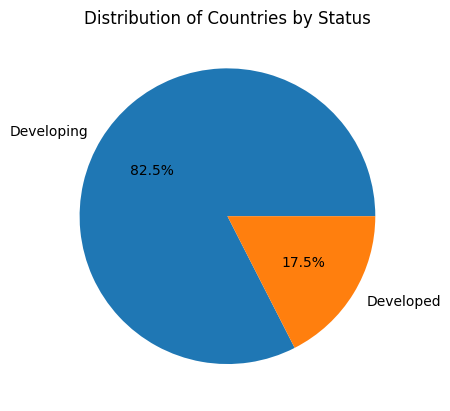

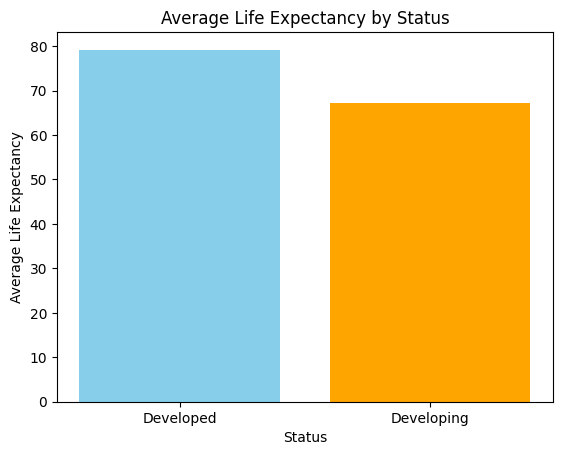

In [188]:
# Checking how many countries are developed vs developing
plt.pie(df['Status'].value_counts(), labels=df['Status'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Countries by Status')
plt.show()

# Calculate average life expectancy for each status
average_life_expectancy = df.groupby('Status')['Life_Expectancy'].mean()

plt.bar(average_life_expectancy.index, average_life_expectancy.values, color=['skyblue', 'orange'])
plt.xlabel('Status')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Status')
plt.show()

### Plotting the rest of the features

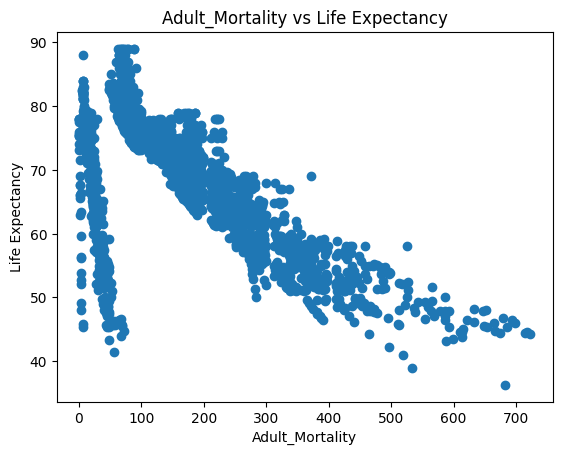

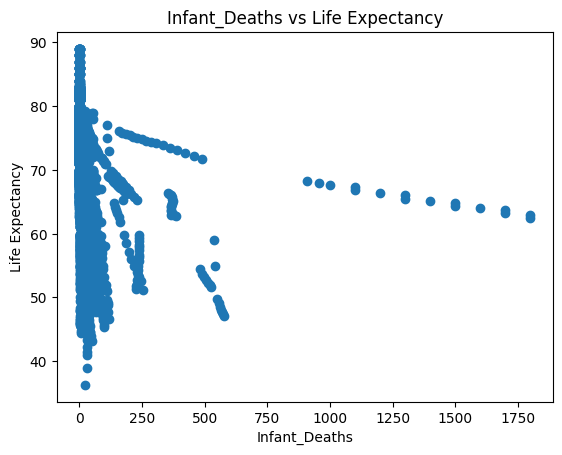

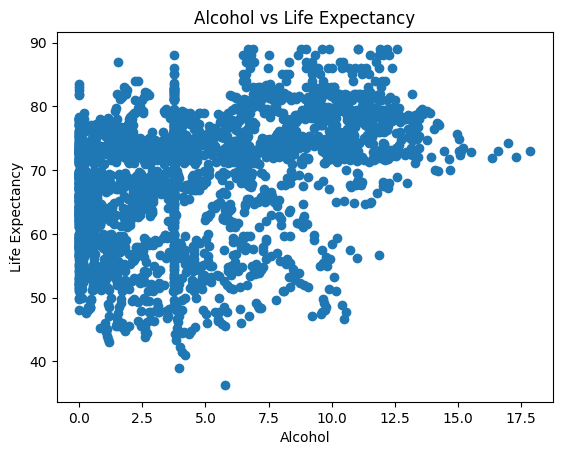

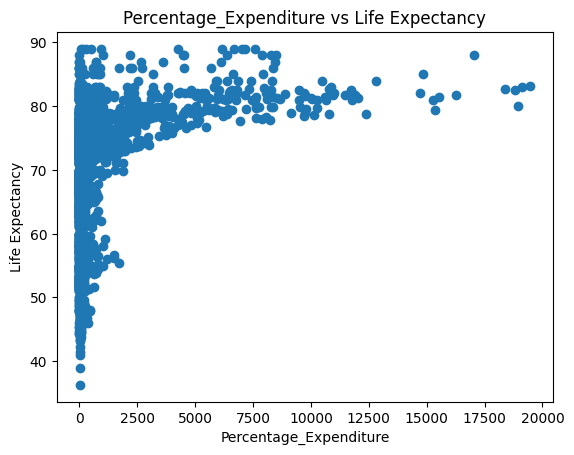

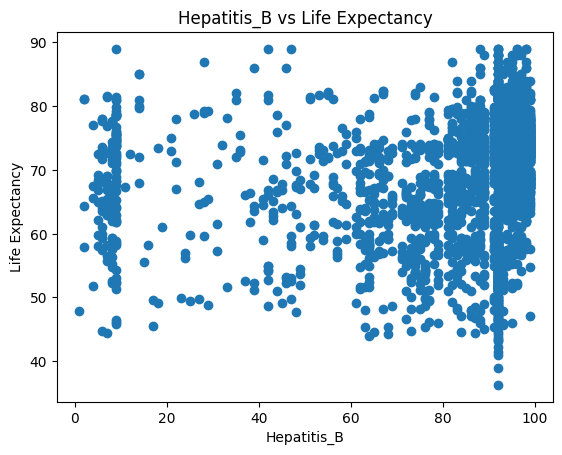

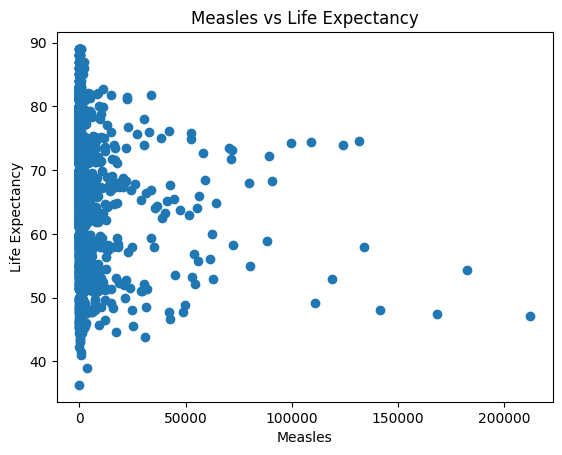

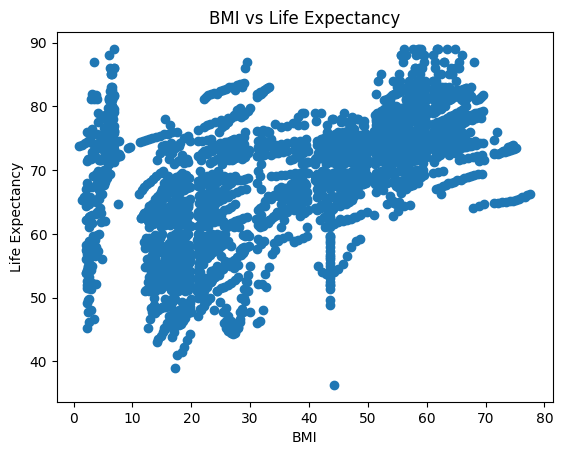

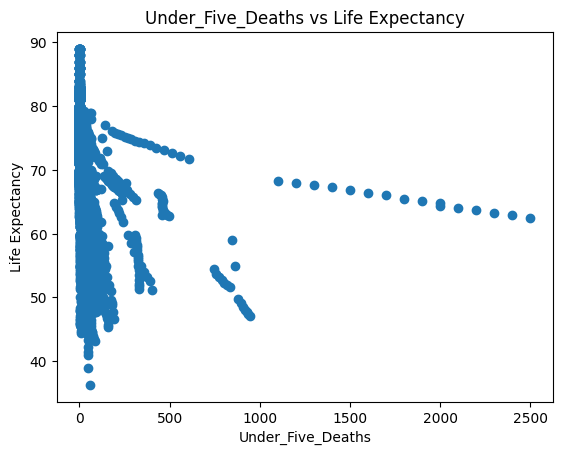

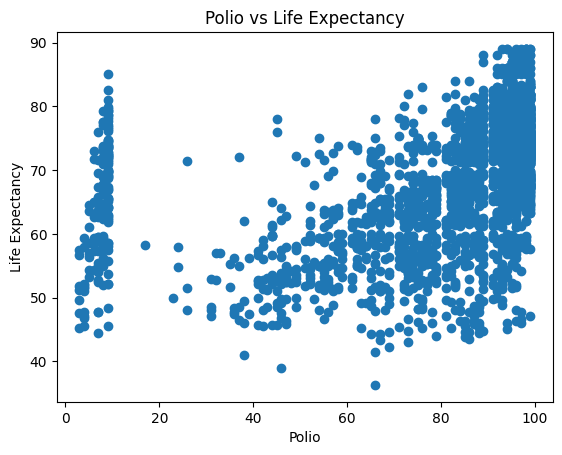

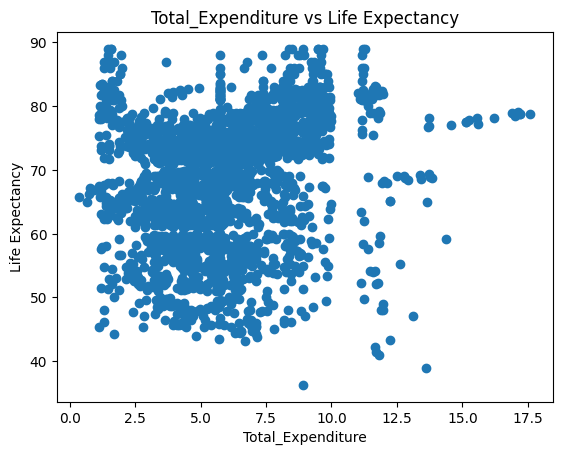

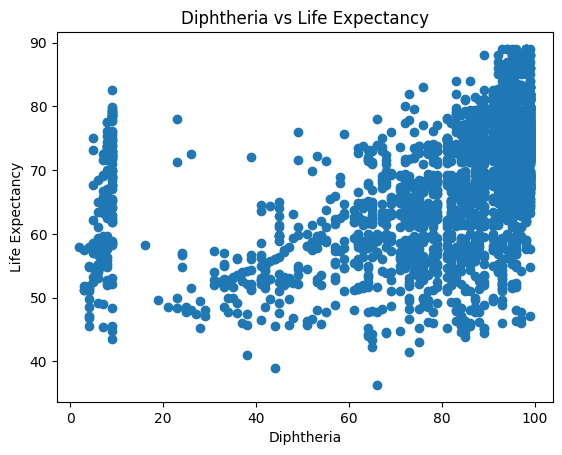

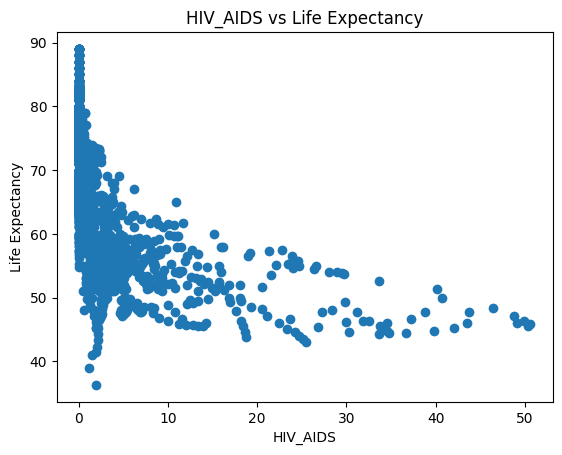

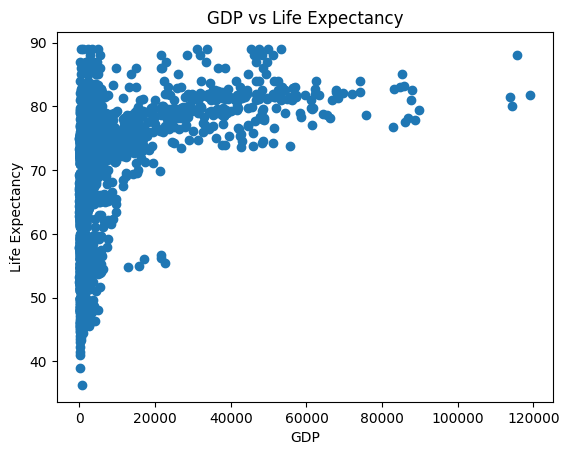

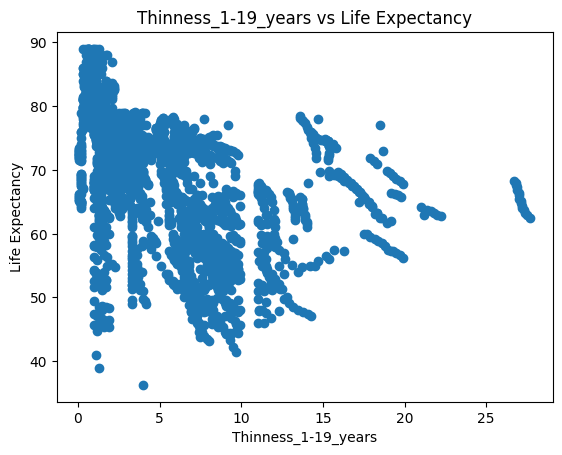

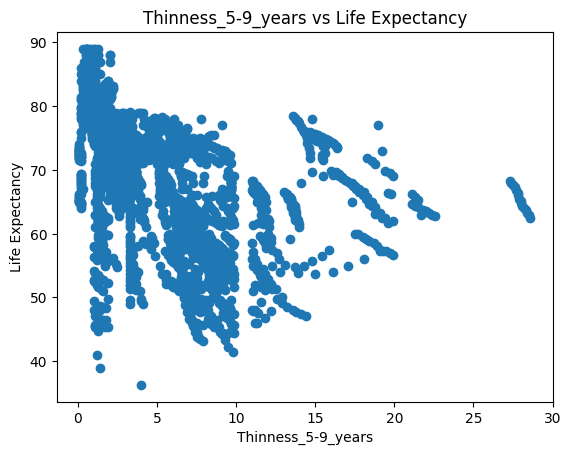

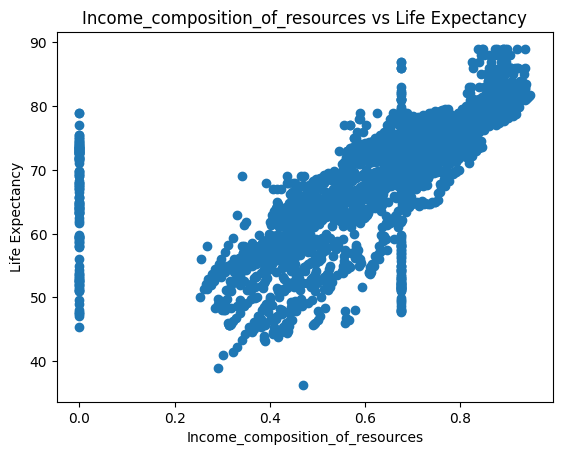

In [205]:
features = ['Adult_Mortality',
            'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
            'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
            'Diphtheria', 'HIV_AIDS', 'GDP', 'Thinness_1-19_years',
            'Thinness_5-9_years', 'Income_composition_of_resources']

# Loop through each feature and plot against 'Life expectancy '
for feature in features:
    plt.scatter(df[feature], df['Life_Expectancy'])
    plt.xlabel(feature.strip())  # Remove extra spaces in feature names
    plt.ylabel('Life Expectancy')
    plt.title(f'{feature.strip()} vs Life Expectancy')
    plt.ticklabel_format(style='plain')
    plt.show()

# Feature Selection
We will divide the data into two categories: socioeconomic features and medical features. Afterward, we will build separate models for each category and compare their performance.


## Socioeconomic Features

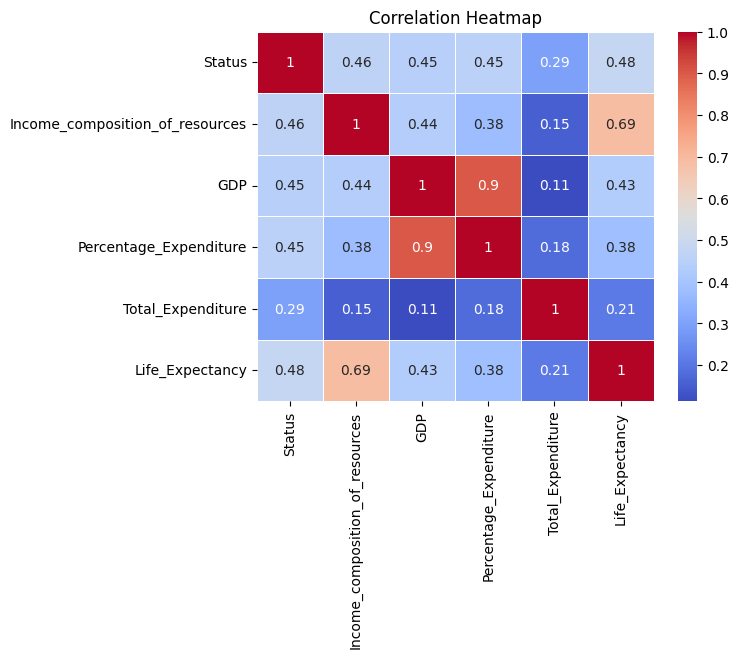

In [266]:
# Creating a heatmap for the socioeconomic features
df_relevant = df[['Status', 'Income_composition_of_resources', 'GDP', 'Percentage_Expenditure', 'Total_Expenditure', 'Life_Expectancy']].copy()
df_relevant['Status'] = df_relevant['Status'].apply(lambda x: 1 if x == 'Developed' else 0)
correlation_matrix = df_relevant.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Results of heatmap
We're focused on each of the features correlation with `Life_Expectancy`. Based on the results it seems that there isn't much of a linear relationship between the socioeconomic factors and `Life_Expectancy` with the exception of `Income_composition_of_resources`.

### Conclusion
Based on these results, the most suitable model for our target variable `Life_Expectancy` would likely be a random forest.




## Medical Features

In [ ]:
# ADD YOUR FEATURE SELECTION HERE

# Creating models

In [250]:
# All imports
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Socioeconomic Models

#### Linear Regression Model

In [264]:
X = df[['Income_composition_of_resources', 'GDP', 'Percentage_Expenditure', 'Total_Expenditure']]
y = df['Life_Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

# Evaluate the model
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

MSE: 47.39536659008466
RMSE: 6.8844292857203975


#### Random Forest Model

In [265]:
df_rf = df[['Status', 'Income_composition_of_resources', 'GDP',
                 'Percentage_Expenditure', 'Total_Expenditure', 'Life_Expectancy']].copy()

# # Encode the Status column (Developed = 1, Developing = 0)
df_rf.loc[:, 'Status_Encoded'] = df_rf['Status'].apply(lambda x: 1 if x == 'Developed' else 0)
df_rf = df_rf.drop(['Status'], axis=1)

X = df_rf.drop(['Life_Expectancy'], axis=1)
y_class = df_rf['Life_Expectancy']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=0)

# Standardize the features (optional, depending on the model)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))

MSE: 18.99292062087279
RMSE: 4.358086807404459


#### Evalutaion
Some of the limitations of splitting up the data like this is that we don't have access to all the features, which is likely affecting the accuracy of the models.

## Medical Models

### Logistic Regression Model

Accuracy: 0.8156996587030717
              precision    recall  f1-score   support

   Below Avg       0.76      0.76      0.76       227
   Above Avg       0.85      0.85      0.85       359

    accuracy                           0.82       586
   macro avg       0.81      0.81      0.81       586
weighted avg       0.82      0.82      0.82       586



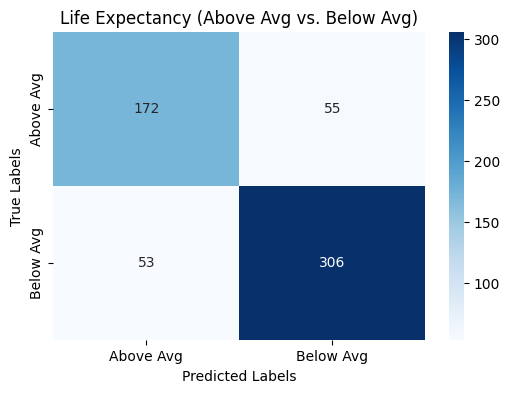

In [239]:
df_copy = df.copy()
df_copy = df_copy.drop(['Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_Five_Deaths', 'Polio', 'Diphtheria',
       'HIV_AIDS', 'Thinness_1-19_years', 'Thinness_5-9_years'], axis=1)

# using One-Hot encoding for the non binary features
df_encoded = pd.get_dummies(df_copy, columns=['Income_composition_of_resources', 'GDP', 'Percentage_Expenditure', 'Total_Expenditure'])

average_life_expectancy = df_copy['Life_Expectancy'].mean()

# 0 = Below Average, 1 = Above Average
df_encoded['Life_Expectancy_Category'] = df_encoded['Life_Expectancy'].apply(lambda x: 1 if x >= average_life_expectancy else 0)


df_encoded['Status_Encoded'] = df_encoded['Status'].apply(lambda x: 1 if x == 'Developed' else 0)
df_encoded = df_encoded.drop(['Status'], axis=1)

# Split the data
X = df_encoded.drop(['Life_Expectancy', 'Life_Expectancy_Category'], axis=1)
y_class = df_encoded['Life_Expectancy_Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred_log, target_names=["Below Avg", "Above Avg"]))

# Evaluate the model with confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Above Avg", "Below Avg"], yticklabels=["Above Avg", "Below Avg"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Life Expectancy (Above Avg vs. Below Avg)")
plt.show()